In [1]:
#4 July 19, 2017       S&P 500: +0.54%]

In [9]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kneed import DataGenerator, KneeLocator 


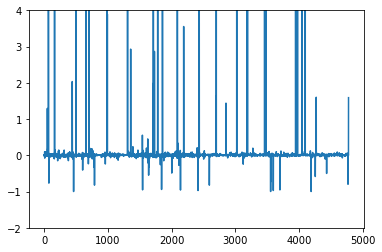

In [4]:
data = pd.read_csv("4.csv") 
price1=np.zeros(4779)
price2=np.zeros(4779)
price1=data['Price 07/18/2017'].values
price2=data['Price 7/19/2017'].values
pricechange=(price2-price1)/price1
pricechange.shape
x=np.arange(4779)
plt.plot(x,pricechange)
plt.ylim(-2,4)
plt.show()

67 25.349999999999994
656 14.166666666666666
989 21.35714285714286
1309 35.19047619047619
1714 9689.0
1782 23.365853658536587
1857 1435.8117461982172
2091 27473.999999999996
2434 10.049250535331906
3023 22.352941176470587
3189 13.804804804804803
3191 5991.499999999999
3460 7223.999999999999
3483 2095.0
3947 29.419793145406608
4048 180.48148148148147
4098 110.37037037037037


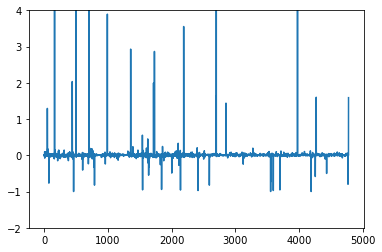

In [5]:
for i in range(4779):
    if pricechange[i]>10:
        print(i,pricechange[i])
        pricechange[i]=0
plt.plot(x,pricechange)
plt.ylim(-2,4)
plt.show()

In [13]:
cluster_distance=[]
clusters=[]
for k in range(40,170,5): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1  #how many stocks in each cluster 
            count[int(price3index[i][0])][1]+=pricechange[i]   #sum of distance in each cluster
            center=count[:,1]/(count[:,0]+1e-9)  #new centers

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print(k,total)
    cluster_distance.append(total)
    clusters.append(k)

40 19.15272891884011
45 19.064289591202538
50 18.497338556207293
55 18.41190841876914
60 17.90561253299508
65 17.974304844596322
70 17.806310457629753
75 17.662237565168432
80 17.471109941638474
85 17.395551832120958
90 17.479678017686872
95 17.282943691474262
100 17.346298249829356
105 17.161960238502644
110 17.12855390244921
115 17.05001055708646
120 17.15292455886198
125 16.896375890842883
130 16.92373205726724
135 16.890499585676636
140 16.80401231681025
145 16.645213404415923
150 16.80925562787729
155 16.7420138599562
160 16.63745811262131
165 16.696390899923266


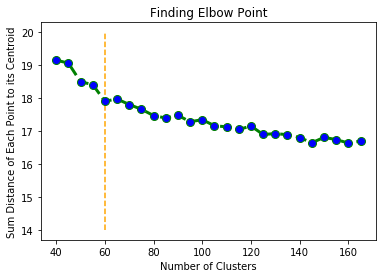

In [14]:
x=clusters
y=cluster_distance

kn=KneeLocator(x, y, curve='convex', direction='decreasing')

kn.knee

plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)

plt.vlines(kn.knee,14, 20,linestyles='dashed',color='orange')

# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('Finding Elbow Point') 
  
# function to show the plot 
plt.show()

In [15]:
kn.knee

60